# Support Vector Machine - Generate Features
This notebook generates features from 'Evaluating Segmentation Error Without Ground Truth' by Kohlberger et al.

author = Caroline Magg <br>
date = 27 August 2020 <br> 

______________________________________
history: <br>
2020-27-08 Generate SVM Features <br>
2020-29-08 Generate SVM Features csv <br>
2020-03-09 Generate standardized SVM Features <br>
2020-11-09 Generate standardized SVM Features for 15-20 <br>

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import scipy
import logging as log
import skimage.segmentation as segmentation
from scipy.spatial.distance import cdist

In [2]:
log.basicConfig(format='%(levelname)s:%(message)s', level=log.INFO)

### Add dependencies

In [3]:
# add KidsBrainProject main folder to paths
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../utils/'))

In [4]:
# add path to data here
path_data = "../../Data/" 

data_brain = pd.read_csv("../../Data/data_Brain.csv")

# Data

In [5]:
all_files = [ filename for filename in os.listdir("../../Data/") if filename.endswith( "csv" ) and 'test' in filename ]
all_files

['test_Brain.csv',
 'test_CerebellPOSTYL.csv',
 'test_Cingulumleft.csv',
 'test_Cingulumright.csv',
 'test_Corpuscallosum.csv',
 'test_CTV.csv',
 'test_CTV1.csv',
 'test_CTV2.csv',
 'test_Fornix.csv',
 'test_GTV.csv',
 'test_Hypothalamus.csv',
 'test_PapezCircle.csv',
 'test_PTV1.csv',
 'test_PTV2.csv',
 'test_Scalp.csv',
 'test_TemporalLobeLt.csv',
 'test_TemporalLobeRt.csv',
 'test_ThalamusantL.csv',
 'test_ThalamusantR.csv',
 'test_Thalamusleft.csv',
 'test_Thalamusright.csv']

In [6]:
#df = pd.read_csv("../../Data/data_Brain.csv", delimiter=';')
df = pd.read_csv("../../Data/test_Brain.csv", delimiter=';')
df.tail()

,PatientID,Img,Init,Segm,Slice,RoiName
650,20,../../Data/20/Segmentation/png/20_slice145.png,../../Data/20/Segmentation/init/20_init_Brain_...,../../Data/20/Segmentation/t0/20_t0_Brain_slic...,145,Brain
651,20,../../Data/20/Segmentation/png/20_slice146.png,../../Data/20/Segmentation/init/20_init_Brain_...,../../Data/20/Segmentation/t0/20_t0_Brain_slic...,146,Brain
652,20,../../Data/20/Segmentation/png/20_slice147.png,../../Data/20/Segmentation/init/20_init_Brain_...,../../Data/20/Segmentation/t0/20_t0_Brain_slic...,147,Brain
653,20,../../Data/20/Segmentation/png/20_slice148.png,../../Data/20/Segmentation/init/20_init_Brain_...,../../Data/20/Segmentation/t0/20_t0_Brain_slic...,148,Brain
654,20,../../Data/20/Segmentation/png/20_slice149.png,../../Data/20/Segmentation/init/20_init_Brain_...,../../Data/20/Segmentation/t0/20_t0_Brain_slic...,149,Brain


In [7]:
df.loc[130]

PatientID                                                   15
Img             ../../Data/15/Segmentation/png/15_slice164.png
Init         ../../Data/15/Segmentation/init/15_init_Brain_...
Segm         ../../Data/15/Segmentation/t0/15_t0_Brain_slic...
Slice                                                      164
RoiName                                                  Brain
Name: 130, dtype: object

In [8]:
df2 = df[df['PatientID']==15]
df2.tail()

,PatientID,Img,Init,Segm,Slice,RoiName
126,15,../../Data/15/Segmentation/png/15_slice160.png,../../Data/15/Segmentation/init/15_init_Brain_...,../../Data/15/Segmentation/t0/15_t0_Brain_slic...,160,Brain
127,15,../../Data/15/Segmentation/png/15_slice161.png,../../Data/15/Segmentation/init/15_init_Brain_...,../../Data/15/Segmentation/t0/15_t0_Brain_slic...,161,Brain
128,15,../../Data/15/Segmentation/png/15_slice162.png,../../Data/15/Segmentation/init/15_init_Brain_...,../../Data/15/Segmentation/t0/15_t0_Brain_slic...,162,Brain
129,15,../../Data/15/Segmentation/png/15_slice163.png,../../Data/15/Segmentation/init/15_init_Brain_...,../../Data/15/Segmentation/t0/15_t0_Brain_slic...,163,Brain
130,15,../../Data/15/Segmentation/png/15_slice164.png,../../Data/15/Segmentation/init/15_init_Brain_...,../../Data/15/Segmentation/t0/15_t0_Brain_slic...,164,Brain


In [9]:
list_of_gt_mask = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df2['Init']]
list_of_pred_mask = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df2['Segm']]
list_of_img = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df2['Img']]

In [10]:
len(list_of_gt_mask), len(list_of_img), len(list_of_pred_mask)

(131, 131, 131)

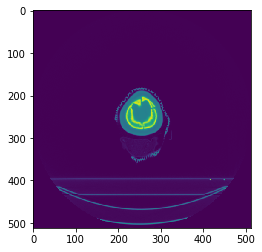

In [11]:
plt.imshow(list_of_img[2])

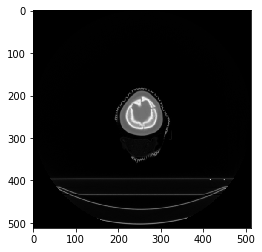

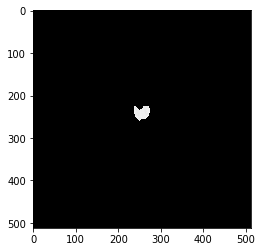

In [12]:
idx = 2
segm = list_of_gt_mask[idx]
img = list_of_img[idx].copy()
plt.imshow(img, cmap='gray')
plt.show()
img[segm==0] = 0
plt.imshow(img, cmap='gray')

In [13]:
np.unique(img)

array([  0, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121], dtype=uint8)

In [14]:
mask = img.copy()

# Features

In [15]:
from SVMFeatures import SVMFeatures

In [16]:
all_files = [ filename for filename in os.listdir("../../Data/") if filename.endswith( "csv" ) and 'test' in filename ]
all_files

['test_Brain.csv',
 'test_CerebellPOSTYL.csv',
 'test_Cingulumleft.csv',
 'test_Cingulumright.csv',
 'test_Corpuscallosum.csv',
 'test_CTV.csv',
 'test_CTV1.csv',
 'test_CTV2.csv',
 'test_Fornix.csv',
 'test_GTV.csv',
 'test_Hypothalamus.csv',
 'test_PapezCircle.csv',
 'test_PTV1.csv',
 'test_PTV2.csv',
 'test_Scalp.csv',
 'test_TemporalLobeLt.csv',
 'test_TemporalLobeRt.csv',
 'test_ThalamusantL.csv',
 'test_ThalamusantR.csv',
 'test_Thalamusleft.csv',
 'test_Thalamusright.csv']

In [17]:
for file in all_files:
    df = pd.read_csv(os.path.join("../../Data/",file), delimiter=';')
    print(file)
    list_of_gt_mask = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df['Init']]
    list_of_pred_mask = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df['Segm']]
    list_of_img = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in df['Img']]
    indep_features, dep_features = SVMFeatures(list_of_img, list_of_gt_mask, list_of_pred_mask, 1).calculate(standardize=False)
    indep_features.to_csv(os.path.join("../../Data/features_standardized_test",file.replace('test','features')), index=False, sep=';')  
    dep_features.to_csv(os.path.join("../../Data/features_standardized_test",file.replace('test','error_metrics')), index=False, sep=';')
    #indep_features.to_csv(os.path.join("../../Data/features_standardized",file.replace('data','features')), index=False, sep=';')  
    #dep_features.to_csv(os.path.join("../../Data/features_standardized",file.replace('data','error_metrics')), index=False, sep=';')

test_Brain.csv


INFO: unweighted geometry features
INFO: weighted geometry features
C:\Users\Caroline\Documents\KidsBrainProject\KidsBrainProject\utils\SVMFeatures.py:335: RuntimeWarning: overflow encountered in ubyte_scalars
  return 1 / (1 + beta * ((i1 - i2) / M) ** 2)
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO:NumExpr defaulting to 4 threads.
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_CerebellPOSTYL.csv


INFO: unweighted geometry features
INFO: weighted geometry features
C:\Users\Caroline\Documents\KidsBrainProject\KidsBrainProject\utils\SVMFeatures.py:335: RuntimeWarning: invalid value encountered in true_divide
  return 1 / (1 + beta * ((i1 - i2) / M) ** 2)
C:\Users\Caroline\Documents\KidsBrainProject\KidsBrainProject\utils\SVMFeatures.py:335: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + beta * ((i1 - i2) / M) ** 2)
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: 

test_Cingulumleft.csv
test_Cingulumright.csv


INFO: average surface error


test_Corpuscallosum.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_CTV.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features


test_CTV1.csv
test_CTV2.csv


INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_Fornix.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_GTV.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_Hypothalamus.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_PapezCircle.csv
test_PTV1.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_PTV2.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_Scalp.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_TemporalLobeLt.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_TemporalLobeRt.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_ThalamusantL.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_ThalamusantR.csv


INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error
INFO: unweighted geometry features
INFO: weighted geometry features
INFO: intensity features
INFO: gradient features
INFO: ratio features
INFO: dice coefficient
INFO: jaccard distance
INFO: modified hausdorff distance
INFO: average surface error


test_Thalamusleft.csv
test_Thalamusright.csv


In [18]:
indep_features

,volume,surface_area,weighted_volume,weighted_cut,lh_weighted_cut,hl_weighted_cut,mean_intensity,median_intensity,sum_intensity,min_intensity,...,lh_weighted_volume_ratio,hl_volume_ratio,hl_weighted_volume_ratio,lh_weighted_cut_ratio,lh_surface_area_ratio,hl_weighted_cut_ratio,hl_surface_area_ratio,weighted_cut_unweighted_cut_ratio,weighted_cut_volume_ratio,surface_area_volume_ratio


In [19]:
indep_features.columns

Index(['volume', 'surface_area', 'weighted_volume', 'weighted_cut',
       'lh_weighted_cut', 'hl_weighted_cut', 'mean_intensity',
       'median_intensity', 'sum_intensity', 'min_intensity', 'max_intensity',
       'iqr_distance', 'std', 'sum_l1', 'sum_l2', 'mean_l1', 'mean_l2',
       'std_l1', 'std_l2', 'median_l1', 'min_l1', 'max_l1', 'iqr_l1',
       'blur_index_ratio', 'lh_volume_ratio', 'lh_weighted_volume_ratio',
       'hl_volume_ratio', 'hl_weighted_volume_ratio', 'lh_weighted_cut_ratio',
       'lh_surface_area_ratio', 'hl_weighted_cut_ratio',
       'hl_surface_area_ratio', 'weighted_cut_unweighted_cut_ratio',
       'weighted_cut_volume_ratio', 'surface_area_volume_ratio'],
      dtype='object')

In [20]:
len(list_of_gt_mask), len(list_of_img), len(list_of_pred_mask)

(0, 0, 0)

In [21]:
test = pd.read_csv(os.path.join("../../Data/features_standardized_test",file.replace('test','features')), sep=';')
#test = pd.read_csv(os.path.join("../../Data/features_standardized",file.replace('data','features')), sep=';')

In [22]:
np.shape(test)

(0, 35)